# import library

In [144]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor as regressor
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# get data

In [145]:
df = pd.read_csv('data_ticker.csv')
df.set_index(['date'], inplace = True)
df.fillna(0,inplace =  True)
df

,Unnamed: 0,ticker,open,close,log return,volatility
date,,,,,,
1990-12-20,0,000001.SS,104.39,104.39,0.000000,0.000000
1990-12-21,1,000001.SS,109.13,109.13,0.044406,0.000000
1990-12-24,2,000001.SS,114.55,114.55,0.048472,0.000000
1990-12-25,3,000001.SS,120.25,120.25,0.048562,0.000000
1990-12-26,4,000001.SS,125.27,125.27,0.040898,0.000000
...,...,...,...,...,...,...
2019-01-28,3859968,^XAYDUNG,961.96,967.05,0.004820,0.196856
2019-01-29,3859969,^XAYDUNG,961.86,955.41,-0.012110,0.198633
2019-01-30,3859970,^XAYDUNG,950.53,940.12,-0.016133,0.198573


In [146]:
df.columns

Index(['Unnamed: 0', 'ticker', 'open', 'close', 'log return', 'volatility'], dtype='object')

In [147]:
df = df [['ticker', 'open', 'close',  'log return', 'volatility']]


# Thử dự đoán volatility dựa trên 1 số mã cổ phiếu liên quan

Tiền xử lý dữ liệu trước khi train

In [221]:
FPT_df = df[df['ticker'] == 'FPT']
FPT_df = FPT_df.iloc[::-1]
ACB_df = df[df['ticker'] == 'ACB']
ACB_df = ACB_df.iloc[::-1]
SHB_df = BID_df = df[df['ticker'] == 'SHB']
SHB_df = SHB_df.iloc[::-1]

In [222]:
final_df = pd.DataFrame({'ACB':ACB_df['volatility'], 'SHB':SHB_df['volatility'], 'FPT':FPT_df['volatility'] }, index = ACB_df.index)
final_df.fillna(0, inplace = True)

In [223]:
final_df['predict'] = final_df['FPT'].shift(5)
final_df

,ACB,SHB,FPT,predict
date,,,,
2021-12-15,0.230162,0.707125,0.189463,NaN
2021-12-14,0.238344,0.705409,0.189226,NaN
2021-12-13,0.241307,0.705649,0.189235,NaN
2021-12-10,0.242985,0.709591,0.192011,NaN
2021-12-09,0.263371,0.714742,0.191406,NaN
...,...,...,...,...
2006-11-27,2.187261,0.000000,0.000000,0.0
2006-11-24,2.187261,0.000000,0.000000,0.0
2006-11-23,2.186966,0.000000,0.000000,0.0


In [224]:
final_df = final_df.iloc[::-1]
final_df = final_df[500:-5]

In [225]:
final_df.head(20)

,ACB,SHB,FPT,predict
date,,,,
2008-11-27,0.624703,0.815270,0.662632,0.649927
2008-11-28,0.654795,0.793602,0.669000,0.640170
2008-12-01,0.657146,0.788641,0.663943,0.644317
2008-12-02,0.640384,0.782477,0.666813,0.652054
2008-12-03,0.630116,0.782477,0.665085,0.647377
2008-12-04,0.610502,0.782477,0.649927,0.637710
2008-12-05,0.617620,0.833290,0.640170,0.636763
2008-12-08,0.607638,0.833290,0.644317,0.638263
2008-12-09,0.608722,0.833290,0.652054,0.640647


In [226]:
train_df, test_df = tts(final_df, train_size = 0.8, shuffle = False)
X_train = train_df.drop(columns = ['predict'])
y_train = train_df['predict']
X_train,X_val,y_train,y_val = tts(X_train,y_train, train_size = 0.8, shuffle = False)
#test_df.drop(['2021-10-01'], inplace = True)
X_test= test_df.drop(columns = ['predict'])
y_test = test_df['predict']

train mô hình dựa trên xgbregressor

In [243]:
model = regressor(n_estimators = 80, max_depth = 6, learning_rate = 0.06)
model.fit(X_train,y_train, eval_set = [(X_val, y_val)], verbose = True, eval_metric = 'rmse')

[0]	validation_0-rmse:0.26432
[1]	validation_0-rmse:0.24877
[2]	validation_0-rmse:0.23424
[3]	validation_0-rmse:0.22055
[4]	validation_0-rmse:0.20776
[5]	validation_0-rmse:0.19570
[6]	validation_0-rmse:0.18451
[7]	validation_0-rmse:0.17387
[8]	validation_0-rmse:0.16399
[9]	validation_0-rmse:0.15470
[10]	validation_0-rmse:0.14602
[11]	validation_0-rmse:0.13781
[12]	validation_0-rmse:0.13011
[13]	validation_0-rmse:0.12298
[14]	validation_0-rmse:0.11623
[15]	validation_0-rmse:0.10987
[16]	validation_0-rmse:0.10397
[17]	validation_0-rmse:0.09845
[18]	validation_0-rmse:0.09334
[19]	validation_0-rmse:0.08852
[20]	validation_0-rmse:0.08402
[21]	validation_0-rmse:0.07989
[22]	validation_0-rmse:0.07613
[23]	validation_0-rmse:0.07258
[24]	validation_0-rmse:0.06949
[25]	validation_0-rmse:0.06645
[26]	validation_0-rmse:0.06390
[27]	validation_0-rmse:0.06157
[28]	validation_0-rmse:0.05922
[29]	validation_0-rmse:0.05700
[30]	validation_0-rmse:0.05494
[31]	validation_0-rmse:0.05320
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [244]:
model.score(X_test, y_test)

0.8180518440982238

<AxesSubplot:xlabel='date'>

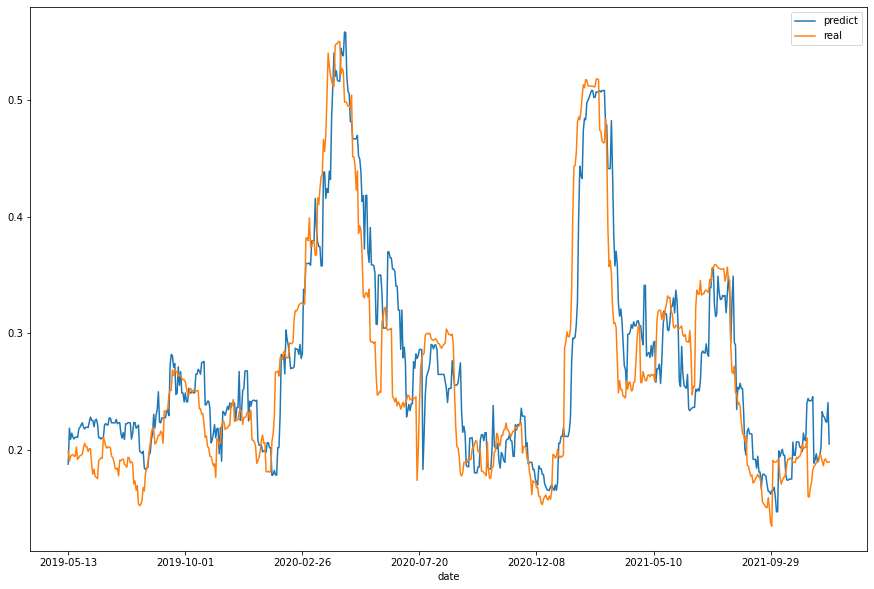

In [232]:
predict = model.predict(X_test)
predict_df = pd.DataFrame({'predict': predict,'real':y_test},index = y_test.index)
predict_df.plot(figsize = (15,10))

# Thử dự đoán volatility qua dữ liệu lịch sử

Lấy dữ liệu

In [233]:
def get_data(str):
    temp_df = df[df['ticker'] == str][35:]
    final_df = pd.DataFrame({'today':temp_df['volatility'],'today_price' : temp_df.close, 'lastday':temp_df['volatility'].shift(1), 'lastlastday':temp_df['volatility'].shift(2), 'next5day':temp_df['volatility'].shift(-5)}, index = temp_df.index)
    final_df.dropna(inplace = True)
    train_df, test_df = tts(final_df, train_size = 0.8, shuffle = False)
    X_train = train_df.drop(columns = ['next5day'])
    y_train = train_df['next5day']
    X_test= test_df.drop(columns = ['next5day'])
    y_test = test_df['next5day']
    price = test_df.today_price
    X_train.drop(columns = {'today_price'}, inplace = True)
    X_test.drop(columns = {'today_price'}, inplace = True)
    return X_train, y_train, X_test, y_test, price

Các hàm dự đoán

In [251]:
def linear_df(str):
    X_train, y_train, X_test, y_test, price = get_data(str)
    model = LinearRegression()
    model.fit(X_train,y_train)
    print(model.score(X_test, y_test))
    predict = model.predict(X_test)
    predict_df = pd.DataFrame({'today': X_test.today,'predict': predict,'real':y_test, 'today price': price}, index = None)
    return predict_df
def xgb_df(str):
    X_train, y_train, X_test, y_test, price = get_data(str)
    X_train, X_val, y_train, y_val = tts(X_train, y_train, train_size = 0.8, shuffle = False) 
    model = regressor(learning_rate = 0.06, max_depth = 6, n_estimators = 100)
    model.fit(X_train,y_train, eval_set = [(X_val, y_val)], eval_metric = 'rmse', verbose = False)
    print(model.score(X_test, y_test))
    predict = model.predict(X_test)
    predict_df = pd.DataFrame({'today':X_test.today, 'predict': predict,'real':y_test, 'today price' : price},index = y_test.index)
    return predict_df

0.8717572461766293


<AxesSubplot:xlabel='date'>

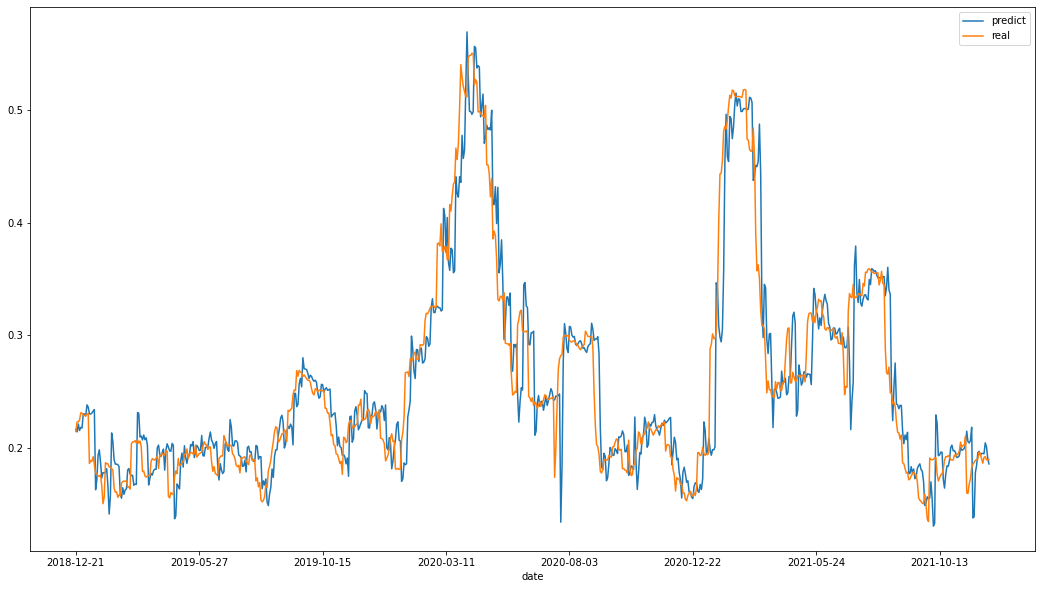

In [257]:
linear_df('FPT')[['predict', 'real']].plot(figsize = (18,10))

0.8639579341756626


<AxesSubplot:xlabel='date'>

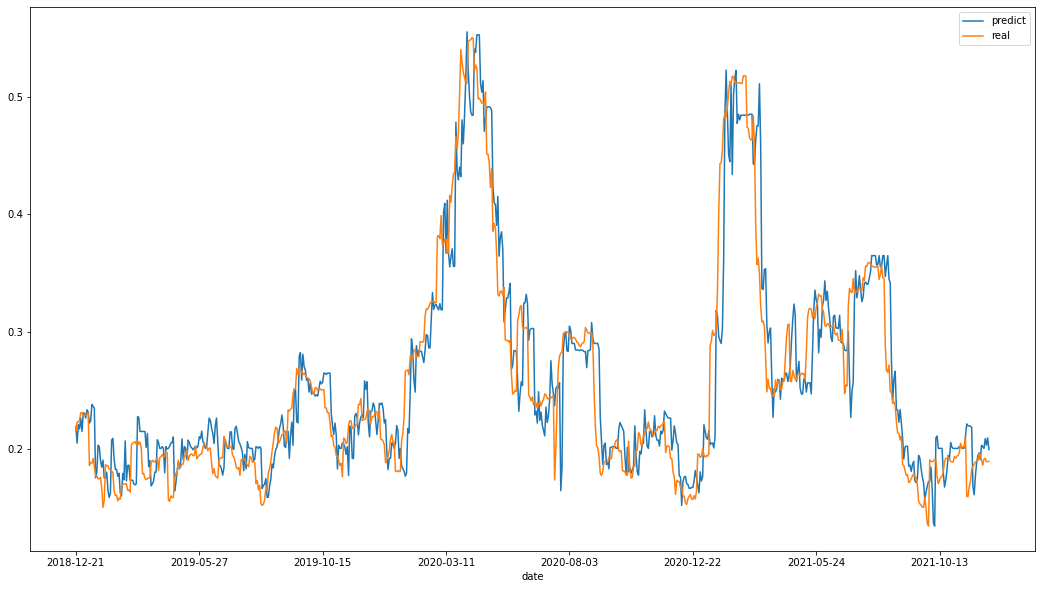

In [258]:
xgb_df('FPT')[['predict', 'real']].plot(figsize = (18,10))

Giả sử tính toán tiền thu về dựa trên chiến lược đầu từ volatility targeting

In [254]:
def calculate(ticker_arr, target_volatility, str):
    n = len(ticker_arr)
    predict = [[]*252]*n
    price = [[]*252]*n
    if str == 'linear':
        for i in range(n):
            temp = linear_df(ticker_arr[i]).tail(252)
            predict[i] = temp['predict']
            price[i] = temp['today price']
            if i == 0:
                index = temp.index
    else:
        for i in range(n):
            temp = xgb_df(ticker_arr[i]).tail(252)
            predict[i] = temp['predict']
            price[i] = temp['today price']
            if i == 0:
                index = temp.index
    
    begin_money = 50000000
    money_left = begin_money
    cp = [0]*n
    for i in range(n):
        cp[i] = 100000
        money_left -= cp[i]*price[i][0]
    target = target_volatility/n
    total = [1]
    for i in range(1,252):
        temp_predict = [0]*n
        temp_price = [0]*n
        sum = money_left
        for j in range(n):
            temp_predict[j] = predict[j][i]
            temp_price[j] = price[j][i]
            sum += temp_price[j]*cp[j]

        total.append(sum/begin_money)
        temp_sum = money_left
        temp_cp = [1]*n
        for j in range(n):
            temp_volatility = (cp[j]*temp_price[j]*temp_predict[j])/sum
            temp_cp[j] = round(cp[j]/(temp_volatility/target))
            temp_sum += temp_cp[j]*temp_price[j]
        t = temp_sum/sum
        #print(sum, temp_sum)
        for j in range(n):
            temp_cp[j] =  round(temp_cp[j]/t)-1
            money_left = money_left - (temp_cp[j]-cp[j])*temp_price[j]
            cp[j] = temp_cp[j]

    df = pd.DataFrame({'total': total} )
    df.set_index(index, inplace = True)
    df.plot(figsize = (15, 10))
    print('score:' ,  total[-1])


0.8717572461766293
0.9082427950486567
0.9062148870979099
0.8966900401885655
score: 1.568614486568


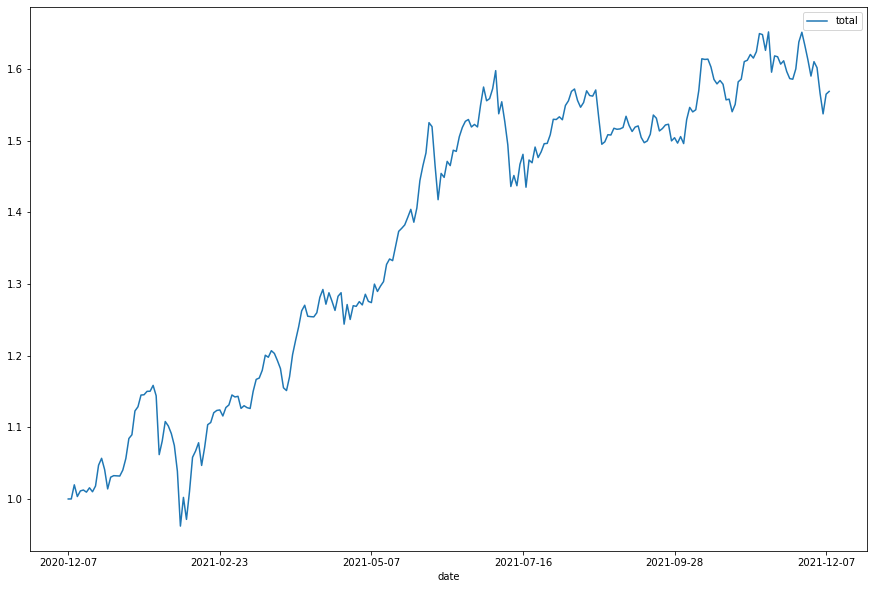

In [255]:
calculate(['FPT', 'SHB', 'ACB', 'AAA'], 0.3, 'linear')        

0.8639579341756626
0.8342924536783783
0.8915752829454882
0.8518588621335602
score: 1.5596355978899998


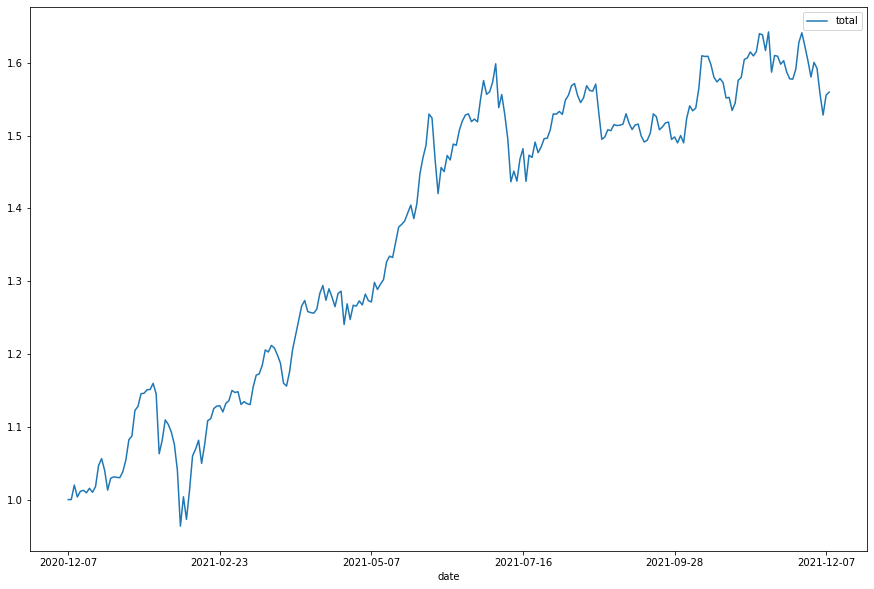

In [256]:
calculate(['FPT', 'SHB', 'ACB', 'AAA'], 0.3, 'xgb')        